### Given two list of x and y coordinates, and a list of errors on y, find the straight line that minimizes the sum of distances between the line and the (x,y) points.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
xdata = np.array([
60.000,
120.000,
180.000,
240.000,
300.000,
360.000,
420.000,
480.000,
540.000,
600.000,
660.000])
ydata = np.array([
15.310,
15.320,
15.330,
15.350,
15.370,
15.390,
15.410,
15.430,
15.450,
15.460,
15.490])
yerr = np.array([
0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
])
if (len(xdata)!=len(ydata)): print ("dimensioni vettori disuguali")
if (len(yerr)!=len(ydata)): print ("dimensioni vettori disuguali")
npoint = len(xdata)
npoint

11

Determiniamo i parametri $a$ and $b$ della retta di best fit $y = b x + a$ che minimizza:
$ \chi^2 = \sum_i \frac{(y_i - b x_i - a)^2}{\sigma_i^2}$
    
$a$ e $b$ sono soluzioni del sistema lineare:
$\begin{bmatrix}
\sum_i \frac{1}{\sigma_i^2} & \sum_i \frac{x_i}{\sigma_i^2}\\
\sum_i \frac{x_i}{\sigma_i^2} & \sum_i \frac{x_i^2}{\sigma_i^2}
\end{bmatrix}$
$\begin{bmatrix} a\\b \end{bmatrix}$ = 
$\begin{bmatrix} \sum_i \frac{y_i}{\sigma_i^2} \\ \sum_i \frac{x_i y_i}{\sigma_i^2}\end{bmatrix}$

In forma matriciale : DA = B quindi A = D^(-1)B

In [3]:
yerrSq = yerr*yerr
sum_one_over_yerrSq = (1./yerrSq).sum()
sum_x_over_yerrSq = (xdata/yerrSq).sum()
sum_xSq_over_yerrSq = (xdata*xdata/yerrSq).sum()
sum_y_over_yerrSq = (ydata/yerrSq).sum()
sum_xy_over_yerrSq = (xdata*ydata/yerrSq).sum()

Calcolo Coefficiente correlazione lineare

In [4]:
sum_x = (xdata).sum()
sum_y = (ydata).sum()
xmean=sum_x/npoint
ymean=sum_y/npoint
ameanx=xdata-xmean
varx = (ameanx*ameanx).sum()
devstx = np.sqrt(varx)
ameany = ydata-ymean
vary = (ameany*ameany).sum()
devsty = np.sqrt(vary)
covxy = (ameanx*ameany).sum()
corrcoeff=covxy/(devstx*devsty)
print ("coefficiente correlazione = ",corrcoeff)

coefficiente correlazione =  0.9963925198073199


In [5]:
matD = np.array([[sum_one_over_yerrSq,sum_x_over_yerrSq],[sum_x_over_yerrSq,sum_xSq_over_yerrSq]])
matD

array([[1.1000e+05, 3.9600e+07],
       [3.9600e+07, 1.8216e+10]])

In [6]:
matD_inv = np.linalg.inv(matD)
matD_inv

array([[ 4.18181818e-05, -9.09090909e-08],
       [-9.09090909e-08,  2.52525253e-10]])

Check D^(-1)D = I

In [7]:
np.dot(matD,matD_inv)

array([[ 1.00000000e+00, -1.73472348e-18],
       [ 0.00000000e+00,  1.00000000e+00]])

In [8]:
matB = np.array([sum_y_over_yerrSq,sum_xy_over_yerrSq])
matB

array([1.69310e+06, 6.10728e+08])

In [9]:
np.dot(matD_inv,matB)

array([1.52816364e+01, 3.06060606e-04])

Calcolo parametri fit

In [10]:
a, b = np.dot(matD_inv,matB)[0],np.dot(matD_inv,matB)[1]
print (" intercetta a (u.m.)= ", a)
print (" coeff.angolare b (u.m.)= ", b)

 intercetta a (u.m.)=  15.281636363636352
 coeff.angolare b (u.m.)=  0.00030606060606061525


Calcolo errori sui parametri

In [11]:
siga, sigb = np.sqrt(matD_inv[0,0]), np.sqrt(matD_inv[1,1])
print (" errore su intercetta siga (u.m.)= ",siga)
print (" errore su coeff.angolare sigb (u.m.)= ",sigb)

 errore su intercetta siga (u.m.)=  0.006466697906828633
 errore su coeff.angolare sigb (u.m.)=  1.5891043154093205e-05


Plot

<ErrorbarContainer object of 3 artists>

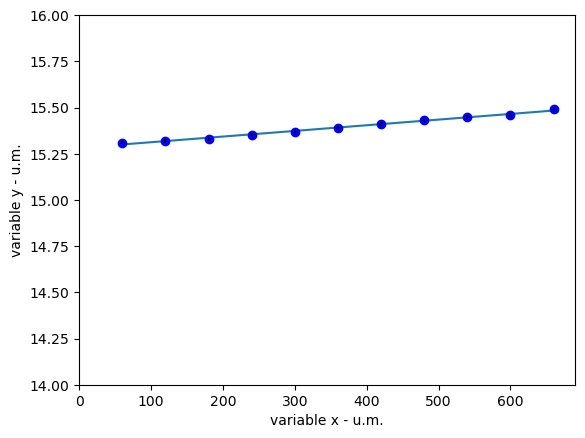

In [12]:
fig, ax = plt.subplots()
ax.set_ylim(14,16)
ax.set_xlim(-0, 690)
ax.set_xlabel('variable x - u.m.')
ax.set_ylabel('variable y - u.m.')
plt.plot(xdata,b*xdata+a,xdata,ydata,'bo')
plt.errorbar(xdata,ydata,yerr=yerr,ecolor='black', ls=" ")

Calcolo X^2 e errore standard della stima

In [13]:
scarto1 = (ydata-a-b*xdata)/yerr
scarto2 = (ydata-a-b*xdata)
chi2 = (scarto1*scarto1).sum()
errstSq = (scarto2*scarto2/(npoint-2)).sum()
errst = np.sqrt(errstSq)
print (" Chi^2 = ",chi2)
print (" errore standard della stima (u.m.) = ",errst)

 Chi^2 =  2.6909090909091447
 errore standard della stima (u.m.) =  0.005467996881764883


In [70]:
#Intercetta con retta vert     x = 843      e retta    y = 15.281636363636395 + 0.00031x

In [71]:
intercettay =15.281636363636395 + 0.00031*843 
intercettay

15.542966363636394

In [81]:
# calcolo covarianza
NN = 11
Dta = 4356000
sy = 0.00546799688176488
sumxdata = 0


for i in xdata:
    sumxdata = sumxdata + i


covarianza = -(sy**2*sumxdata)/Dta
covarianza

-2.718089990817314e-08